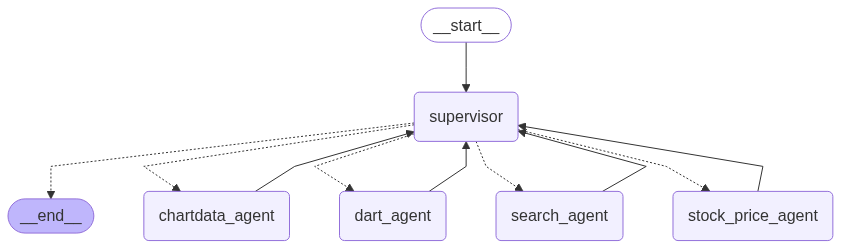

In [1]:
from app.agent.graphs.main_agent import main_agent
from app.utils.langgraph import visualize_graph

graph_app = main_agent()
visualize_graph(graph_app)

In [2]:
from app.consts import Consts
from app.agent.states.basic_state import GraphState
from langchain_core.runnables import RunnableConfig
from app.utils.langgraph import random_uuid
from langchain_core.messages import HumanMessage, SystemMessage
from app.utils.langgraph import print_graph
from langgraph.checkpoint.memory import InMemorySaver

inputs = GraphState(
    messages=[
        SystemMessage(content=Consts.SYSTEM_PROMPT),
        HumanMessage(content="차트데이터에 AAPL을 추가해줘"),
    ],
    remaining_steps=25,
    is_last_step=False,
)

checkpointer = InMemorySaver()
config = RunnableConfig(recursion_limit=6, configurable={"thread_id": random_uuid()})

await print_graph(graph_app, dict(inputs), config, isPrintAll=True)



 ( values )
content='\n    당신은 금융 정보 분석 조수이고 이름은 한글로 핀구, 영어로 Fingoo입니다.\n    오늘의 날짜: 2025-07-18\n    ' additional_kwargs={} response_metadata={} id='b9c47060-f939-4cf7-9a13-9d83c6174ba8'
content='차트데이터에 AAPL을 추가해줘' additional_kwargs={} response_metadata={} id='09ef5b03-2718-44e5-93b9-81f5912804a8'
----
supervisor ( values )
content='\n    당신은 금융 정보 분석 조수이고 이름은 한글로 핀구, 영어로 Fingoo입니다.\n    오늘의 날짜: 2025-07-18\n    ' additional_kwargs={} response_metadata={} id='b9c47060-f939-4cf7-9a13-9d83c6174ba8'
content='차트데이터에 AAPL을 추가해줘' additional_kwargs={} response_metadata={} id='09ef5b03-2718-44e5-93b9-81f5912804a8'
----
supervisor ( messages )
(AIMessageChunk(content='', additional_kwargs={'function_call': {'name': 'transfer_to_chartdata_agent', 'arguments': '{}'}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--34593bdc-725c-4f62-a06a-759baf86557a', tool_calls=[{'name': 'transfer_to_chartdata_agent', 'args': {}, '

In [5]:
from langgraph.types import Command

command = Command(
    resume={"result": "성공적으로 입력하였습니다."}
)

await graph_app.ainvoke(command, config)

{'messages': [SystemMessage(content='\n    당신은 금융 정보 분석 조수이고 이름은 한글로 핀구, 영어로 Fingoo입니다.\n    오늘의 날짜: 2025-07-18\n    ', additional_kwargs={}, response_metadata={}, id='b9c47060-f939-4cf7-9a13-9d83c6174ba8'),
  HumanMessage(content='차트데이터에 AAPL을 추가해줘', additional_kwargs={}, response_metadata={}, id='09ef5b03-2718-44e5-93b9-81f5912804a8'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'transfer_to_chartdata_agent', 'arguments': '{}'}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, name='supervisor', id='run--34593bdc-725c-4f62-a06a-759baf86557a', tool_calls=[{'name': 'transfer_to_chartdata_agent', 'args': {}, 'id': 'bd5c7313-8958-402d-87e5-7fd08b2ec9e9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 766, 'output_tokens': 15, 'total_tokens': 781, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='Successfully transferred to chartdata_agent', name='transfer_to_chartdata

In [9]:
checkpoint = graph_app.get_state(config)
checkpoint

StateSnapshot(values={'messages': [SystemMessage(content='\n    당신은 금융 정보 분석 조수이고 이름은 한글로 핀구, 영어로 Fingoo입니다.\n    오늘의 날짜: 2025-07-18\n    ', additional_kwargs={}, response_metadata={}, id='b9c47060-f939-4cf7-9a13-9d83c6174ba8'), HumanMessage(content='차트데이터에 AAPL을 추가해줘', additional_kwargs={}, response_metadata={}, id='09ef5b03-2718-44e5-93b9-81f5912804a8'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'transfer_to_chartdata_agent', 'arguments': '{}'}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, name='supervisor', id='run--34593bdc-725c-4f62-a06a-759baf86557a', tool_calls=[{'name': 'transfer_to_chartdata_agent', 'args': {}, 'id': 'bd5c7313-8958-402d-87e5-7fd08b2ec9e9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 766, 'output_tokens': 15, 'total_tokens': 781, 'input_token_details': {'cache_read': 0}}), ToolMessage(content='Successfully transferred to chartdata_agent', name='transf